# Taxonomic Analysis

Inputs:
- qiime files taxonomy.qza and metadata.tsv
- folder of AGORA2 reconstructions

Outputs:
- SILVA_genus_counts.csv (taxon_genus_asvs)
- 


With filtasv_abund_thresh=0.0001, we get about 621 ASVs for 7700 samples.  
With filtasv_abund_thresh=0.00001, we get about 2176 ASVs for 7700 samples.  

In [19]:
import sys
sys.path.append('../')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mb_xai import mb_utils
from functools import reduce
# df = reduce(lambda df1,df2: pd.merge(df1,df2,on='id'), dfList)

filt=True
filtasv_sample_thresh=2
filtasv_abund_thresh=0.0001
asv_count_threshold = 0
SAVE_OUTPUT = True

DATA_LOC = '../../../Data/microbiome_xai/'
FIG_SAVE_LOC = "../figures/"
# TABLE_SAVE_LOC = "../tables/"
TABLE_SAVE_LOC = DATA_LOC+"agp_data/"

dir_agora2 = "/mnt/d/Microbiome_project/reconstructions/AGORA2_recons/"
# dir_taxon = "../merged-data/"
dir_taxon_asv = DATA_LOC+"agp_data/taxonomy-data/"
dir_taxon_silva = DATA_LOC+"agp_data/silva_merged-data/"

In [2]:
!ls /mnt/d

'$RECYCLE.BIN'			 'Install Discovery for Windows.exe'
'$UGM'				  Microbiome_project
 IBA_project			 'System Volume Information'
'Install Discovery for Mac.dmg'


Load batches of final dataset and concatenate
- the below code crashes when loading sample 3 (2gb), so use "run_taxonomic_analysis.py" in terminal instead.

In [3]:
frames = []
frames_asv = []

filtasv_abund_thresh = 0.0001 # 0.0001
for i in [3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 17, 18, 22, 23, 24, 25, 30, 33, 34, 35, 36, 37, 38, 39]:
# for i in [30, 33, 34, 35, 36, 37, 38, 39]:
    fn_taxon_silva_fd = DATA_LOC+"agp_data/"+"merged-data_fd_%d/metadata.tsv"%(i)
    print(fn_taxon_silva_fd)

    taxon_df = pd.read_csv(fn_taxon_silva_fd, sep='\t',header=0,index_col="id", skiprows=[1])
    taxon_df.columns = [x.replace(".R1", "") for x in taxon_df.columns]
    taxon_df, asv_df = mb_utils.get_silva_taxon_df(
        taxon_df, filt=filt, filtasv_sample_thresh=filtasv_sample_thresh, filtasv_abund_thresh=filtasv_abund_thresh)
    # frames_asv.append(asv_df)
    
    taxon_df_reset = taxon_df.reset_index().copy()
    frames.append(taxon_df_reset)
    
# Now merge all the dataframes
#taxon_df_merge = pd.merge(taxon_df_reset, taxon_df_4_reset, on=["id","Taxon", "Confidence", "genus_species", "species", "genus", "family"], how="outer")
# taxon_df_merge = pd.merge(taxon_df_reset, taxon_df_4_reset, on=["id","Taxon", "Confidence", "genus_species", "species", "genus", "family"], how="outer")
taxon_df_merge = reduce(lambda df1,df2: pd.merge(df1,df2,on=["id","Taxon", "Confidence", "genus_species", "species", "genus", "family"], how="outer"), frames)

taxon_df_merge_drop = taxon_df_merge.drop(["genus_species", "species", "genus", "family"],axis=1).copy()
taxon_df_merge_drop.fillna(0,inplace=True)
taxon_df_merge_drop.set_index("id",inplace=True)
print(taxon_df_merge_drop.shape)
print("run filtering once again...")
taxon_df_merge, asv_df_merged = mb_utils.get_silva_taxon_df(
    taxon_df_merge_drop, filt=filt, filtasv_sample_thresh=filtasv_sample_thresh, filtasv_abund_thresh=filtasv_abund_thresh)

print(taxon_df_merge.shape)
print(len(set(taxon_df_merge.columns)))
print(len(taxon_df_merge.index.unique()))
# print(len(taxon_df_merge["id"].unique()))

# asv_df_merged = pd.concat(frames_asv, axis=1)
print(asv_df_merged.shape)
print(len(set(asv_df_merged.columns)))
print(len(asv_df_merged.index.unique()))

taxon_df_merge.head()

../../../Data/microbiome_xai/agp_data/merged-data_fd_3/metadata.tsv


In [3]:
taxon_df_merge.shape

(622, 7724)

In [7]:
asv_df_merged.head()

,Confidence,10317.000007058,10317.000007068,10317.000007072,10317.000007073,10317.000007075,10317.000007083,10317.000007108,10317.000007127,10317.000007139,...,10317.000100430,10317.000100436,10317.000100441,10317.000100445,10317.000100492,10317.000100493,10317.000100535,10317.000101026,10317.000101034,10317.000101035
0,0,2694,0,1123,183,28,30007,3983,20959,1148,...,773,510,690,1055,243,0,2093,923,730,1534
1,0,482,0,37,287,0,9943,902,4049,301,...,142,198,923,79,346,76,207,1270,880,388
2,0,0,0,1193,1180,47,6240,4159,583,520,...,186,85,0,197,30,222,157,322,418,453
3,0,0,0,0,0,0,9941,0,0,994,...,0,0,1304,48,0,272,0,348,0,125
4,0,277,0,106,0,0,7675,854,1171,313,...,233,37,65,34,414,57,75,385,778,178


In [4]:
if SAVE_OUTPUT==True:
    taxon_df_merge.to_csv(TABLE_SAVE_LOC + "SILVA_taxon_df_merge_fd.csv")
    asv_df_merged.to_csv(TABLE_SAVE_LOC + "asv_df_merged_fd.csv")

print("...generating species, genus-species, and genus counts dataframes...")
genus_species_df = mb_utils.group_asvs(
    taxon_df_merge, asv_df_merged, grp_id="species", asv_count_threshold=asv_count_threshold)
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "SILVA_species_counts_fd.csv")
    
genus_species_df = mb_utils.group_asvs(
    taxon_df_merge, asv_df_merged, grp_id="genus_species", asv_count_threshold=asv_count_threshold)
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "SILVA_genus-species_counts_fd.csv")
    
genus_species_df = mb_utils.group_asvs(
    taxon_df_merge, asv_df_merged, grp_id="genus", asv_count_threshold=asv_count_threshold)
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "SILVA_genus_counts_fd.csv")

...generating species, genus-species, and genus counts dataframes...
(89, 8807)
(89, 8807)
(321, 8807)
(321, 8807)
(133, 8807)
(133, 8807)


In [3]:
# Second appproach, don't filter till AFTER joining dataframes
frames = []
for i in [4, 5, 6, 7, 8, 30, 33, 34, 35, 36, 37, 38, 39]:
# for i in [38, 39]:
    fn_taxon_silva_fd = DATA_LOC+"agp_data/"+"merged-data_fd_%d/metadata.tsv"%(i)
    print(fn_taxon_silva_fd)

    taxon_df = pd.read_csv(fn_taxon_silva_fd, sep='\t',header=0,index_col="id", skiprows=[1])
    taxon_df.columns = [x.replace(".R1", "") for x in taxon_df.columns]
    taxon_df_reset = taxon_df.reset_index().copy()
    frames.append(taxon_df_reset)
    
# Now merge all the dataframes
taxon_df_merge = reduce(lambda df1,df2: pd.merge(df1,df2,on=["id","Taxon", "Confidence"], how="outer"), frames)
taxon_df_merge.set_index("id",inplace=True)

taxon_df_merge, asv_df_merged = mb_utils.get_silva_taxon_df(
        taxon_df_merge.fillna(0), filt=filt, filtasv_sample_thresh=filtasv_sample_thresh, filtasv_abund_thresh=filtasv_abund_thresh)

print(taxon_df_merge.shape)
print(len(set(taxon_df_merge.columns)))
print(len(taxon_df_merge.index.unique()))

print(asv_df_merged.shape)
print(len(set(asv_df_merged.columns)))
print(len(asv_df_merged.index.unique()))
del frames
taxon_df_merge.head()

../../../Data/microbiome_xai/agp_data/merged-data_fd_4/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_5/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_6/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_7/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_8/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_30/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_33/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_34/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_35/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_36/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_37/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_38/metadata.tsv
../../../Data/microbiome_xai/agp_data/merged-data_fd_39/metadata.tsv


In [8]:
asv_df_merged = pd.concat(frames_asv, axis=1)
print(asv_df_merged.shape)
print(len(set(asv_df_merged.columns)))
print(len(asv_df_merged.index.unique()))

taxon_df_merge.head()

(1417, 5123)
5123
1417


,id,Taxon,Confidence,10317.000007058,10317.000007068,10317.000007072,10317.000007073,10317.000007075,10317.000007083,10317.000007108,...,10317.000100430,10317.000100436,10317.000100441,10317.000100445,10317.000100492,10317.000100493,10317.000100535,10317.000101026,10317.000101034,10317.000101035
0,ac5402de1ddf427ab8d2b0a8a0a44f19,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.85988,2694.0,0.0,1123.0,183.0,28.0,30007.0,3983.0,...,773.0,510.0,690.0,1055.0,243.0,0.0,2093.0,923.0,730.0,1534.0
1,ea2b0e4a93c24c6c3661cbe347f93b74,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,1.00000,482.0,0.0,37.0,287.0,0.0,9943.0,902.0,...,142.0,198.0,923.0,79.0,346.0,76.0,207.0,1270.0,880.0,388.0
2,79280cea51a6fe8a3432b2f266dd34db,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.99915,0.0,0.0,1193.0,1180.0,47.0,6240.0,4159.0,...,186.0,85.0,0.0,197.0,30.0,222.0,157.0,322.0,418.0,453.0
3,c4f9ef34bd2919511069f409c25de6f1,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,1.00000,0.0,0.0,0.0,0.0,0.0,9941.0,0.0,...,0.0,0.0,1304.0,48.0,0.0,272.0,0.0,348.0,0.0,125.0
4,c162a4f3943238810eba8a25f0563cca,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,1.00000,277.0,0.0,106.0,0.0,0.0,7675.0,854.0,...,233.0,37.0,65.0,34.0,414.0,57.0,75.0,385.0,778.0,178.0


Previous approach

In [3]:
### Generate tables and figures for taxonomy

taxon_asv_df = pd.read_csv(dir_taxon_asv+'taxonomy.tsv', sep='\t') # , dtype=np.float64
taxon_asv_df.head()
# print(len(taxon_asv_df["Feature ID"].unique()))
# print(taxon_asv_df.shape)

taxon_df = pd.read_csv(dir_taxon_silva+'metadata.tsv', sep='\t',header=0,index_col="id", skiprows=[1])
taxon_df.columns = [x.replace(".R1", "") for x in taxon_df.columns]

taxon_df, asv_df = mb_utils.get_silva_taxon_df(
    taxon_df, filt=filt, filtasv_sample_thresh=filtasv_sample_thresh, filtasv_abund_thresh=filtasv_abund_thresh)

FILTERED: # of asvs < sample count: 21609 , # of asvs < percent abundance: 23875


In [4]:
taxon_df.shape

(715, 976)

(110, 970)
(110, 970)
0.17572500298390425


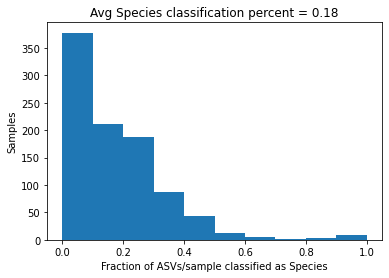

In [11]:
genus_species_df = mb_utils.group_asvs(
    taxon_df, asv_df, grp_id="species", asv_count_threshold=asv_count_threshold)
# genus_species_df = group_asvs(taxon_df,asv_df, grp_id="species", asv_count_threshold=1000)
g = mb_utils.plot_asv_frac(genus_species_df, grp_id="Species")
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "SILVA_species_counts.csv")

(369, 970)
(369, 970)
0.9507375296400385


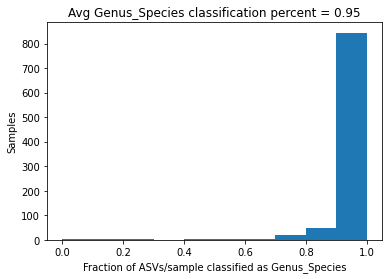

In [12]:
genus_species_df = mb_utils.group_asvs(
    taxon_df, asv_df, grp_id="genus_species", asv_count_threshold=asv_count_threshold)
# genus_species_df = group_asvs(taxon_df,asv_df, grp_id="species", asv_count_threshold=1000)
g = mb_utils.plot_asv_frac(genus_species_df, grp_id="Genus_Species")
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "SILVA_genus-species_counts.csv")

(167, 970)
(167, 970)
0.9417018576174304


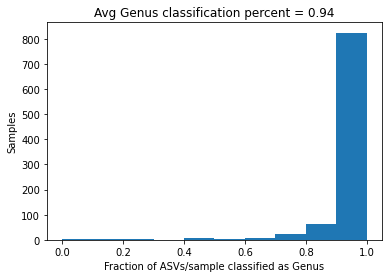

In [20]:
genus_species_df = mb_utils.group_asvs(taxon_df,asv_df, grp_id="genus", asv_count_threshold=asv_count_threshold)
g = mb_utils.plot_asv_frac(genus_species_df, grp_id="Genus")
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "SILVA_genus_counts.csv")

# Compare AGORA models with strains

In [2]:
taxon_df = pd.read_csv(TABLE_SAVE_LOC + "SILVA_taxon_df_merge_fd.csv",index_col=0)
taxon_df.fillna("",inplace=True)
asv_df = pd.read_csv(TABLE_SAVE_LOC + "asv_df_merged_fd.csv",index_col=0)

In [3]:
taxon_df.shape

(639, 9586)

In [4]:
total_num_genus = len(list(set(taxon_df["genus"].values)))
print("Total number of unique genera in our data is %d"%(total_num_genus))

Total number of unique genera in our data is 133


In [5]:
genus_strain_dict, species_strain_dict, genus_species_dict = mb_utils.get_agora_strain_dicts(dir_agora2)
taxon_df, agora_notin = mb_utils.get_agora_taxon_df(taxon_df, genus_strain_dict, species_strain_dict)

414
genus: in- 99 , not in- 34
species: in- 51 , not in- 37


(100, 9580)
(100, 9580)
0.8284570994318335


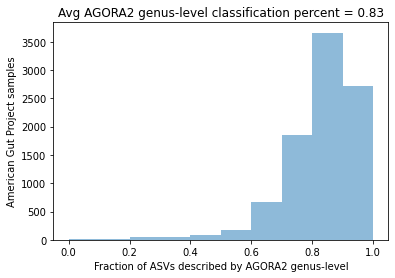

In [6]:
genus_species_df = mb_utils.group_asvs(taxon_df, asv_df, grp_id="agora", asv_count_threshold=0)
g = mb_utils.plot_asv_frac(genus_species_df, grp_id="AGORA2 genus-level")
if SAVE_OUTPUT==True:
    genus_species_df.to_csv(TABLE_SAVE_LOC + "AGORA_SILVA_genus_counts_fd.csv")

## How about the top 25 AGORA genus?

In [25]:
DIR_MERGED = "/mnt/d/Microbiome_project/reconstructions/merged_recons/"
number_of_genus = 70

In [26]:
genus_ASV = mb_utils.group_asvs(taxon_df,asv_df, grp_id="genus", asv_count_threshold=asv_count_threshold)

common_genus = genus_ASV.loc[genus_ASV.index.notnull()].sum(axis=1).sort_values(
    ascending=False
)[:number_of_genus].index.tolist()

models_2_join, topX_genus = [],[]
for mod in os.listdir(DIR_MERGED):
    mod_name = mod.split(".json")[0]
    if mod_name in genus_species_dict.keys() and mod_name in common_genus:
        models_2_join.append(mod)
        topX_genus.append(mod_name)
print("# of models to build into community:",len(models_2_join))
print(len(topX_genus),len(common_genus))

(133, 9580)
(133, 9580)
# of models to build into community: 50
50 70


In [9]:
list(set(common_genus)-set(topX_genus))

['',
 'muribaculaceae',
 'nk4a214',
 'prevotellaceae',
 'clostridia',
 'agathobacter',
 'uba1819',
 'cag-352',
 'monoglobus',
 'cag-56',
 'holdemanella',
 'ucg-005',
 'incertae',
 'ucg-003',
 'fenollaria',
 'escherichia-shigella',
 'colidextribacter',
 'rf39',
 'hafnia-obesumbacterium',
 'ucg-002']

(51, 9580)
(51, 9580)
0.7994936207673118


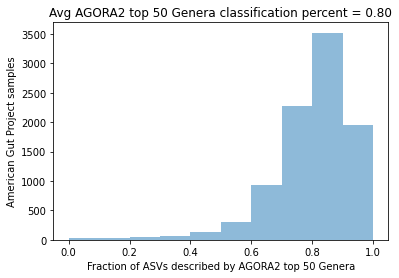

In [27]:
taxon_df["agora_top50"]=taxon_df["agora"].map(lambda x: x if x in topX_genus else "")
genus_species_df = mb_utils.group_asvs(taxon_df, asv_df, grp_id="agora_top50", asv_count_threshold=0)
g = mb_utils.plot_asv_frac(genus_species_df, grp_id="AGORA2 top 50 Genera")

In [14]:
taxon_agora_top_df = taxon_df.copy()
genus_ASV = mb_utils.group_asvs(taxon_df,asv_df, grp_id="genus", asv_count_threshold=asv_count_threshold, verbose=False)

x_list = list(range(2, 100))
x_list_model_overlap = []
y_list = []
for number_of_genus in x_list:

    common_genus = genus_ASV.loc[genus_ASV.index.notnull()].sum(axis=1).sort_values(
        ascending=False)[:number_of_genus].index.tolist()
    models_2_join, topX_genus = [],[]
    for mod in os.listdir(DIR_MERGED):
        mod_name = mod.split(".json")[0]
        if mod_name in genus_species_dict.keys() and mod_name in common_genus:
            topX_genus.append(mod_name)

    x_list_model_overlap.append(len(topX_genus))
    taxon_agora_top_df["agora_topX"]=taxon_agora_top_df["agora"].map(lambda x: x if x in topX_genus else "")

    g_s_df= mb_utils.group_asvs(taxon_agora_top_df, asv_df, grp_id="agora_topX", asv_count_threshold=0,verbose=False)
    g_s_frac = 1 - g_s_df.iloc[0,]/g_s_df.sum()
    y_list.append(np.mean(g_s_frac))

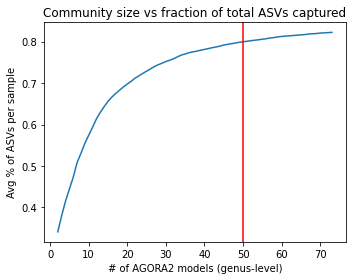

In [16]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 4))
# ax1.plot(x_list, y_list)
ax1.plot(x_list_model_overlap, y_list)
ax1.set_title("Community size vs fraction of total ASVs captured")
ax1.set_xlabel("# of AGORA2 models (genus-level)")
ax1.set_ylabel("Avg % of ASVs per sample")
ax1.axvline(x=50, c="red")
f.tight_layout()
f.savefig(FIG_SAVE_LOC+"topN-AGORA2_vs_ASVs_fd.png")
f.savefig(FIG_SAVE_LOC+"topN-AGORA2_vs_ASVs_fd.svg", format="svg")
f.savefig(FIG_SAVE_LOC+"topN-AGORA2_vs_ASVs_fd.eps", format="eps")

# Compare current 50 genera model with the new set of top 50 genus

In [29]:
import mb_xai.gut_data as gd

In [30]:
DATA_LOC = '../../../Data/microbiome_xai/'
gut_data = gd.GutData()
gut_data.load_data(
    # FILE_COMM_MODEL='../data/reconstructions/community_5_TOP-vegan.pickle',
    FILE_COMM_MODEL= DATA_LOC + 'reconstructions/community_50_TOP.pickle',
    # FILE_GENUS_ASVS = "../data/agp_data/taxon_genus_asvs.csv",
    FILE_GENUS_ASVS = DATA_LOC + 'agp_data/taxon_genus_asvs.csv',
    # FILE_METADATA = DATA_LOC + "agp_data/mcdonald_agp_metadata.txt",
    FILE_METADATA = DATA_LOC + "agp_data/metadata_biosample_filtered.csv",
    DIR_SIM_DATA = DATA_LOC + "micom-sim-data/"  # "../data/micom-sim-data/",
)
gut_data.norm_abundances(filter_model=True, add_delta=True) ## Filters genus to those in model, adds small value to abundaces
gut_data.X_df = gut_data.asv_df.T.copy()
gut_data.sample_list = gut_data.X_df.index.to_list()
# gut_data.set_vegan_df(sample_num=40)
# ## Set vegan df changes X_df and y_df and will therefore change medium_df. Be sure to run medium df after setting samples
# medium_df = pd.DataFrame(1000, columns=gut_data.com_model.medium.keys(), index = gut_data.X_df.index)
# gut_data.sample_medium_dict = medium_df.T.to_dict()
# gut_data.return_fluxes = True
# gut_data.pfba_bool = True # otherwise optimum values will not be fluxes but intead min(sum flux)

Fixed EX_tDHNACOA(e)
... normalizing raw ASV abundances to fractions, dropping samples with 0 total abundances
# of genus in model and not filterd out of QA/QC: 50, # of genus not in model:0


In [31]:
gut_data.com_model

Name,None
Memory address,0x07fa3066d8700
Number of metabolites,94710
Number of reactions,115248
Number of groups,0
Objective expression,1.0*community_objective
Compartments,"c__prevotella, e__prevotella, p__prevotella, m, c__roseburia, e__roseburia, c__bacteroides, e__bacteroides, p__bacteroides, c__lachnospira, e__lachnospira, c__bifidobacterium, e__bifidobacterium, c__blautia, e__blautia, c__streptococcus, e__streptococcus, c__lactobacillus, e__lactobacillus, c__cutibacterium, e__cutibacterium, c__rothia, e__rothia, c__pseudomonas, e__pseudomonas, p__pseudomonas, c__alistipes, e__alistipes, p__alistipes, e__clostridium, c__clostridium, c__actinomyces, e__actinomyces, c__christensenellaceae, e__christensenellaceae, c__brevundimonas, e__brevundimonas, p__brevundimonas, c__phascolarctobacterium, e__phascolarctobacterium, p__phascolarctobacterium, c__corynebacterium, e__corynebacterium, c__gemella, e__gemella, c__lachnoclostridium, e__lachnoclostridium, c__veillonella, e__veillonella, p__veillonella, c__haemophilus, e__haemophilus, p__haemophilus, c__enterococcus, e__enterococcus, c__stenotrophomonas, e__stenotrophomonas, p__stenotrophomonas, c__parasutterella, e__parasutterella, p__parasutterella, c__coprococcus, e__coprococcus, c__faecalibacterium, e__faecalibacterium, c__morganella, e__morganella, p__morganella, c__subdoligranulum, e__subdoligranulum, c__romboutsia, e__romboutsia, c__dialister, e__dialister, p__dialister, c__eubacterium, e__eubacterium, c__parabacteroides, e__parabacteroides, p__parabacteroides, c__staphylococcus, e__staphylococcus, c__dorea, e__dorea, c__comamonas, e__comamonas, p__comamonas, c__erysipelotrichaceae, e__erysipelotrichaceae, c__lachnospiraceae, e__lachnospiraceae, c__bilophila, e__bilophila, p__bilophila, c__barnesiella, e__barnesiella, p__barnesiella, e__ruminococcus, c__ruminococcus, c__butyricicoccus, e__butyricicoccus, c__acinetobacter, e__acinetobacter, p__acinetobacter, c__akkermansia, e__akkermansia, p__akkermansia, c__porphyromonas, e__porphyromonas, p__porphyromonas, c__neisseria, e__neisseria, p__neisseria, c__anaerostipes, e__anaerostipes, c__paraprevotella, e__paraprevotella, p__paraprevotella, c__fusicatenibacter, e__fusicatenibacter, c__serratia, e__serratia, p__serratia"


In [35]:
len(list(set(topX_genus).intersection(set(list(gut_data.com_model.taxonomy.index)))))

40

In [24]:
gut_data.com_model.taxonomy.index

Index(['prevotella', 'roseburia', 'bacteroides', 'lachnospira',
       'bifidobacterium', 'blautia', 'streptococcus', 'lactobacillus',
       'cutibacterium', 'rothia', 'pseudomonas', 'alistipes', 'clostridium',
       'actinomyces', 'christensenellaceae', 'brevundimonas',
       'phascolarctobacterium', 'corynebacterium', 'gemella',
       'lachnoclostridium', 'veillonella', 'haemophilus', 'enterococcus',
       'stenotrophomonas', 'parasutterella', 'coprococcus', 'faecalibacterium',
       'morganella', 'subdoligranulum', 'romboutsia', 'dialister',
       'eubacterium', 'parabacteroides', 'staphylococcus', 'dorea',
       'comamonas', 'erysipelotrichaceae', 'lachnospiraceae', 'bilophila',
       'barnesiella', 'ruminococcus', 'butyricicoccus', 'acinetobacter',
       'akkermansia', 'porphyromonas', 'neisseria', 'anaerostipes',
       'paraprevotella', 'fusicatenibacter', 'serratia'],
      dtype='object', name='id')

# Final plots

In [20]:
taxon_df = pd.read_csv(TABLE_SAVE_LOC + "SILVA_taxon_df_merge_fd.csv",index_col=0)
taxon_df.fillna("",inplace=True)
asv_df = pd.read_csv(TABLE_SAVE_LOC + "asv_df_merged_fd.csv",index_col=0)

In [29]:
def plot_asv_frac(g_s_df, ax=None, grp_id="Genus"):
    """
    Plot histogram of total ASVs per sample classified as specific tax grp
    """
    g_s_frac = 1 - g_s_df.iloc[0,]/g_s_df.sum()
    print(np.mean(g_s_frac))
    if ax==None:
        g = g_s_frac.plot(kind="hist")
    else:
        g = g_s_frac.plot(kind="hist", ax=ax)
    g.set_title("Avg %s classification percent = %.2f"%(grp_id,np.mean(g_s_frac)))
    g.set_xlabel("Fraction of ASVs classified into %s"%(grp_id))
    g.set_ylabel("Samples")
    return g

(196, 5123)
(196, 5123)
0.9997236548365124


KeyError: 'agora'

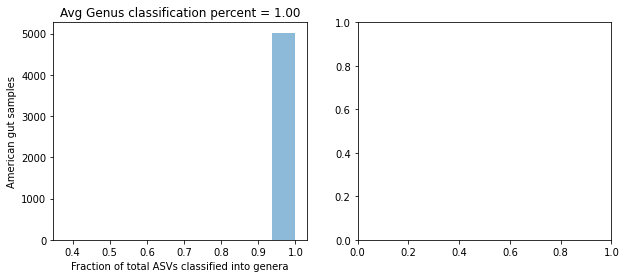

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

genus_species_df = mb_utils.group_asvs(taxon_df,asv_df, grp_id="genus", asv_count_threshold=asv_count_threshold)
ax1 = mb_utils.plot_asv_frac(genus_species_df, ax=ax1, grp_id="Genus")
ax1.set_xlabel("Fraction of total ASVs classified into genera")
ax1.set_ylabel("American gut samples")

genus_species_df = mb_utils.group_asvs(taxon_df, asv_df, grp_id="agora", asv_count_threshold=0)
ax2 = mb_utils.plot_asv_frac(genus_species_df, ax=ax2, grp_id="AGORA2 genus-level")
ax2.set_xlabel("Fraction of total ASVs captured by AGORA2 models")
ax2.set_ylabel("American gut samples")

f.tight_layout()
# f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.png")
# f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.svg")
f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.png")
f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.svg")
f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.eps", format="eps")
TABLE_SAVE_LOC


In [17]:
def plot_asv_frac(g_s_df, ax=None, grp_id="Genus", alpha=0.8):
    """
    Plot histogram of total ASVs per sample classified as specific tax grp
    alpha=.8, edgecolor = 'black',
    """
    g_s_frac = 1 - g_s_df.iloc[0,]/g_s_df.sum()
    print(np.mean(g_s_frac))
    if ax==None:
        g = g_s_frac.plot(kind="hist", alpha=0.5)
    else:
        g = g_s_frac.plot(
            kind="hist", ax=ax, alpha=0.5, edgecolor = 'black', bins=10,
            label="Avg %s classification = %.1f%%"%(grp_id,np.mean(g_s_frac)*100)
            # label="Avg %s classification = %.2f%%"%(grp_id,np.mean(g_s_frac))
        )
    # g.set_title("Avg %s classification percent = %.2f"%(grp_id,np.mean(g_s_frac)))
    g.set_xlabel("Fraction of ASVs described by %s"%(grp_id))
    g.set_ylabel("American Gut Project samples")
    return g

# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium, high]]
# labels= ["low","medium", "high"]
# plt.legend(handles, labels)

(88, 9580)
(88, 9580)
0.20188271540434646
(133, 9580)
(133, 9580)
0.9525146969373569
414
genus: in- 99 , not in- 34
species: in- 51 , not in- 37
(100, 9580)
(100, 9580)
0.8284570994318335


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

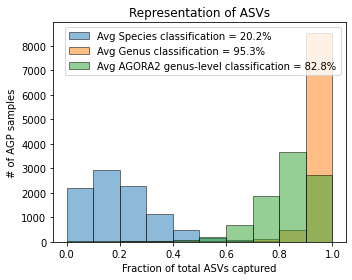

In [18]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 4))

genus_species_df = mb_utils.group_asvs(taxon_df, asv_df, grp_id="species", asv_count_threshold=asv_count_threshold)
ax1 = plot_asv_frac(genus_species_df, ax=ax1, grp_id="Species")

genus_species_df = mb_utils.group_asvs(taxon_df,asv_df, grp_id="genus", asv_count_threshold=asv_count_threshold)
ax1 = plot_asv_frac(genus_species_df, ax=ax1, grp_id="Genus")

genus_strain_dict, species_strain_dict, genus_species_dict = mb_utils.get_agora_strain_dicts(dir_agora2)
taxon_df, agora_notin = mb_utils.get_agora_taxon_df(taxon_df, genus_strain_dict, species_strain_dict)
genus_species_df = mb_utils.group_asvs(taxon_df, asv_df, grp_id="agora", asv_count_threshold=0)
ax1 = plot_asv_frac(genus_species_df, ax=ax1, grp_id="AGORA2 genus-level")

ax1.set_xlabel("Fraction of total ASVs captured")
ax1.set_ylabel("# of AGP samples")
ax1.set_title("Representation of ASVs")
ax1.legend()

f.tight_layout()
# f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured.png")
# f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured.svg")

f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.png")
f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.svg")
f.savefig(FIG_SAVE_LOC+"percent_ASVs_captured_fd.eps", format="eps")

In [22]:
genus_species_df

,10317.000007058,10317.000007068,10317.000007072,10317.000007073,10317.000007075,10317.000007083,10317.000007108,10317.000007127,10317.000007139,10317.000007151,...,10317.000100430,10317.000100436,10317.000100441,10317.000100445,10317.000100492,10317.000100493,10317.000100535,10317.000101026,10317.000101034,10317.000101035
,600.0,0.0,1652.0,3097.0,3252.0,43740.0,25877.0,13046.0,4712.0,3168.0,...,710.0,673.0,1833.0,3469.0,361.0,609.0,668.0,1278.0,6644.0,902.0
acidaminococcus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acinetobacter,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aeromonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
akkermansia,10.0,0.0,560.0,0.0,202.0,4477.0,10.0,0.0,152.0,20.0,...,3352.0,0.0,0.0,688.0,129.0,46.0,31.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
terrisporobacter,0.0,0.0,0.0,429.0,35.0,21.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0
turicibacter,0.0,0.0,0.0,1109.0,44.0,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
tyzzerella,0.0,0.0,17.0,124.0,0.0,111.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
veillonella,0.0,0.0,7.0,0.0,0.0,53.0,67.0,80.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,5.0


In [21]:
genus_species_df = mb_utils.group_asvs(taxon_df,asv_df, grp_id="genus", asv_count_threshold=asv_count_threshold)
genus_species_df.sum(axis=1).sort_values(ascending=False)[:20]

(133, 9580)
(133, 9580)


bacteroides            47862017.0
faecalibacterium       14758626.0
                        7766775.0
prevotella              7536076.0
eubacterium             6449274.0
alistipes               5305937.0
blautia                 5105800.0
agathobacter            4944968.0
pseudomonas             4640902.0
akkermansia             4338184.0
parabacteroides         4106898.0
lachnospiraceae         3810013.0
ruminococcus            3744445.0
ucg-002                 3563520.0
subdoligranulum         3547051.0
christensenellaceae     2764029.0
clostridia              2713502.0
roseburia               2686593.0
bifidobacterium         2177295.0
dialister               1848230.0
dtype: float64

In [22]:
genus_strain_dict, species_strain_dict, genus_species_dict = mb_utils.get_agora_strain_dicts(dir_agora2)
taxon_df, agora_notin = mb_utils.get_agora_taxon_df(taxon_df, genus_strain_dict, species_strain_dict)
agora_genus_df = mb_utils.group_asvs(taxon_df, asv_df, grp_id="agora", asv_count_threshold=0)

414
genus: in- 99 , not in- 34
species: in- 51 , not in- 37
(100, 9580)
(100, 9580)


In [23]:
agora_genus_df.sum(axis=1).sort_values(ascending=False)[:20]

bacteroides            47862017.0
                       29267432.0
faecalibacterium       14758626.0
prevotella              7536076.0
eubacterium             6449274.0
alistipes               5305937.0
blautia                 5105800.0
pseudomonas             4640902.0
akkermansia             4338184.0
parabacteroides         4106898.0
lachnospiraceae         3810013.0
ruminococcus            3744445.0
subdoligranulum         3547051.0
christensenellaceae     2764029.0
roseburia               2686593.0
bifidobacterium         2177295.0
dialister               1848230.0
anaerostipes            1528157.0
coprococcus             1527090.0
lachnospira             1510303.0
dtype: float64

In [24]:
genus_species_df.sum(axis=1).loc[agora_notin].sort_values(ascending=False)

                                                      7766775.0
agathobacter                                          4944968.0
ucg-002                                               3563520.0
clostridia                                            2713502.0
escherichia-shigella                                  1337477.0
ucg-005                                               1322376.0
cag-352                                                800997.0
nk4a214                                                788207.0
rf39                                                   578028.0
prevotellaceae                                         528581.0
monoglobus                                             483719.0
muribaculaceae                                         483615.0
ucg-003                                                470711.0
fenollaria                                             417614.0
incertae                                               412718.0
colidextribacter                        

In [46]:
genus_species_df.loc["clostridium"].sum()

47063.0

In [44]:
genus_strain_dict.keys()

dict_keys(['abiotrophia', 'acaricomes', 'acaryochloris', 'acetanaerobacterium', 'acetatifactor', 'acetivibrio', 'acetobacterium', 'acetonema', 'achromobacter', 'acidaminobacter', 'acidaminococcus', 'acidobacterium', 'acidovorax', 'acinetobacter', 'actinobacillus', 'actinomyces', 'acutalibacter', 'adlercreutzia', 'advenella', 'aerococcus', 'aeromicrobium', 'aeromonas', 'afipia', 'aggregatibacter', 'agrobacterium', 'akkermansia', 'alcaligenes', 'aliivibrio', 'alistipes', 'alkalibaculum', 'alkaliphilus', 'allobaculum', 'alloiococcus', 'alloprevotella', 'alloscardovia', 'amazonia', 'aminivibrio', 'anaerobacillus', 'anaerobaculum', 'anaerobiospirillum', 'anaerococcus', 'anaerofustis', 'anaeroglobus', 'anaeroplasma', 'anaerosalibacter', 'anaerosporobacter', 'anaerostipes', 'anaerotignum', 'anaerotruncus', 'anaerovorax', 'aneurinibacillus', 'arcanobacterium', 'arcobacter', 'ardenticatena', 'arthrobacter', 'atopobium', 'auritidibacter', 'bacillus', 'bacteroidales', 'bacteroides', 'bacteroidete

# Add specialized phenotypic functions

In [2]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
## my functions/classes
from mb_xai import mb_utils
import mb_xai.gut_data as gd

/Users/erolkavvas/anaconda3/lib/python3.7/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [3]:
FIG_SAVE_LOC = "../figures/"
# DATA_LOC = '../../../Data/community_optimization/data/'
DATA_LOC = '../../../Data/microbiome_xai/'

In [4]:
gut_data = gd.GutData()
gut_data.load_data(
    # FILE_COMM_MODEL='../data/reconstructions/community_5_TOP-vegan.pickle',
    FILE_COMM_MODEL= DATA_LOC + 'reconstructions/community_50_TOP.pickle',
    # FILE_GENUS_ASVS = "../data/agp_data/taxon_genus_asvs.csv",
    FILE_GENUS_ASVS = DATA_LOC + 'agp_data/taxon_genus_asvs.csv',
    # FILE_METADATA = DATA_LOC + "agp_data/mcdonald_agp_metadata.txt",
    FILE_METADATA = DATA_LOC + "agp_data/metadata_biosample_filtered.csv",
    DIR_SIM_DATA = DATA_LOC + "micom-sim-data/"  # "../data/micom-sim-data/",
)
gut_data.norm_abundances(filter_model=True, add_delta=True) ## Filters genus to those in model, adds small value to abundaces
gut_data.X_df = gut_data.asv_df.T.copy()
gut_data.sample_list = gut_data.X_df.index.to_list()
gut_data.set_vegan_df(sample_num=40)
## Set vegan df changes X_df and y_df and will therefore change medium_df. Be sure to run medium df after setting samples
medium_df = pd.DataFrame(1000, columns=gut_data.com_model.medium.keys(), index = gut_data.X_df.index)
gut_data.sample_medium_dict = medium_df.T.to_dict()
gut_data.return_fluxes = True
gut_data.pfba_bool = True # otherwise optimum values will not be fluxes but intead min(sum flux)

Fixed EX_tDHNACOA(e)
... normalizing raw ASV abundances to fractions, dropping samples with 0 total abundances
# of genus in model and not filterd out of QA/QC: 50, # of genus not in model:0


In [6]:
for col in gut_data.metadata_df.columns:
    if "diabetes" in col or "dbt2" in col:
        print(col)

covid_chronic_conditions_diabetes_or_high_blood_sugar
diabetes
diabetes_type
subset_diabetes
diabetes type
subset diabetes


In [8]:
gut_data.metadata_df["diabetes"].unique()

array(['I do not have this condition', 'Not provided', nan,
       'Diagnosed by a medical professional (doctor, physician assistant)',
       'Unknown', 'Self-diagnosed'], dtype=object)

In [12]:
gut_data.metadata_df["diabetes type"].unique()

array([nan, 'Not provided'], dtype=object)

In [ ]:
def set_dbt2_df(self, sample_num=5):
    

In [ ]:
def set_vegan_df(self, sample_num=5):
    """ Helper function for specifying a list of samples that include vegans 
        (will do something similar for IBS and other traits with strong signals)
    """
    col_type = "diet_type"
    y_df = mb_utils.numeric_metadata_col(self.metadata_df, col_type, encode_type="one-hot")
    y_df = mb_utils.drop_notprovided(y_df)

    vegan_samples = y_df["diet_type_vegan"][y_df["diet_type_vegan"]!=0].index.tolist()
    non_vegan_samples = y_df["diet_type_vegan"][y_df["diet_type_vegan"]==0].index.tolist()

    # sample_list = vegan_samples+non_vegan_samples[:len(vegan_samples)]
    sample_list = vegan_samples[:sample_num]+non_vegan_samples[:sample_num]
    y_df = y_df["diet_type_vegan"]
    y_df = y_df.loc[sample_list]
    self.y_df = y_df
    self.sample_list = sample_list
    self.X_df = self.asv_df.T #.loc[sample_list]
    ### match the indices of X and y
    self.match_Xy_df()

In [ ]:
p = "poop"